This notebook computes uniformity metrics for $ugr$ dropouts.

In [1]:
import rubin_sim.maf as maf
import matplotlib.pyplot as plt
from lbg_survey_metrics.metrics import map_number_density, map_pz_mean, map_pz_sig
import numpy as np
from lbg_survey_metrics.metric_plots import plot_map

In [2]:
# Load m5 maps
u5 = maf.MetricBundle.load("data/rubin_sim_m5/internal_u_expt38_nscale1_1v3_4_10yrs_ExgalM5_u.npz").metric_values
g5 = maf.MetricBundle.load("data/rubin_sim_m5/internal_u_expt38_nscale1_1v3_4_10yrs_ExgalM5_g.npz").metric_values
r5 = maf.MetricBundle.load("data/rubin_sim_m5/internal_u_expt38_nscale1_1v3_4_10yrs_ExgalM5_r.npz").metric_values
i5 = maf.MetricBundle.load("data/rubin_sim_m5/internal_u_expt38_nscale1_1v3_4_10yrs_ExgalM5_i.npz").metric_values
z5 = maf.MetricBundle.load("data/rubin_sim_m5/internal_u_expt38_nscale1_1v3_4_10yrs_ExgalM5_z.npz").metric_values

Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes


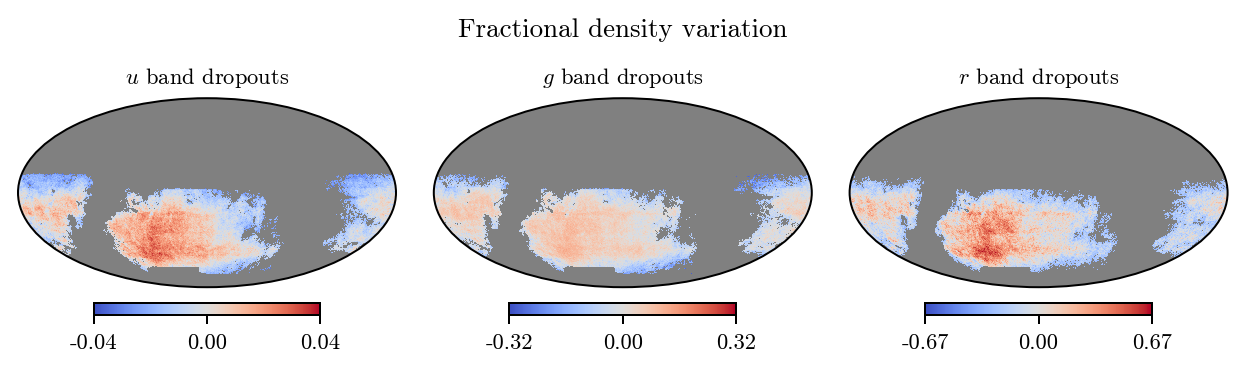

In [4]:
# Plot relative depth variations
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(7, 2), dpi=180)

# Set the title
fig.suptitle("Fractional density variation")

# u dropouts
n = map_number_density(u5, r5, "u")
rdn = (n - np.nanmean(n)) / np.nanmean(n)
plot_map(rdn, "$u$ band dropouts", sub=131)

# g dropouts
n = map_number_density(g5, i5, "g")
rdn = (n - np.nanmean(n)) / np.nanmean(n)
plot_map(rdn, "$g$ band dropouts", sub=132)

# r dropouts
n = map_number_density(r5, z5, "r", cut_on_drop=False)
rdn = (n - np.nanmean(n)) / np.nanmean(n)
plot_map(rdn, "$r$ band dropouts", sub=133)

# Hide axes
ax1.set_axis_off()
ax2.set_axis_off()
ax3.set_axis_off()

# Push axes closer together
plt.subplots_adjust(wspace=0.1)

fig.savefig("figures/map_relative_density.pdf")

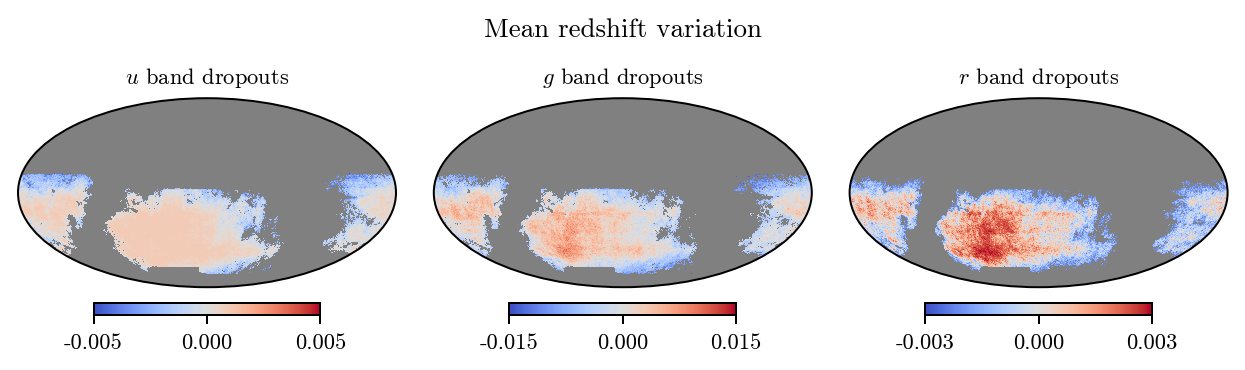

In [5]:
# Plot relative depth variations
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(7, 2), dpi=180)

# Set the title
fig.suptitle("Mean redshift variation")

# u dropouts
pz_mean = map_pz_mean(u5, r5, "u")
dpz_mean = pz_mean - np.nanmean(pz_mean)
plot_map(dpz_mean, "$u$ band dropouts", n_dec=3, sub=131)

# g dropouts
pz_mean = map_pz_mean(g5, i5, "g")
dpz_mean = pz_mean - np.nanmean(pz_mean)
plot_map(dpz_mean, "$g$ band dropouts", n_dec=3, sub=132)

# r dropouts
pz_mean = map_pz_mean(r5, z5, "r", cut_on_drop=False)
dpz_mean = pz_mean - np.nanmean(pz_mean)
plot_map(dpz_mean, "$r$ band dropouts", n_dec=3, sub=133)

# Hide axes
ax1.set_axis_off()
ax2.set_axis_off()
ax3.set_axis_off()

# Push axes closer together
plt.subplots_adjust(wspace=0.1)

fig.savefig("figures/map_pz_mean.pdf")

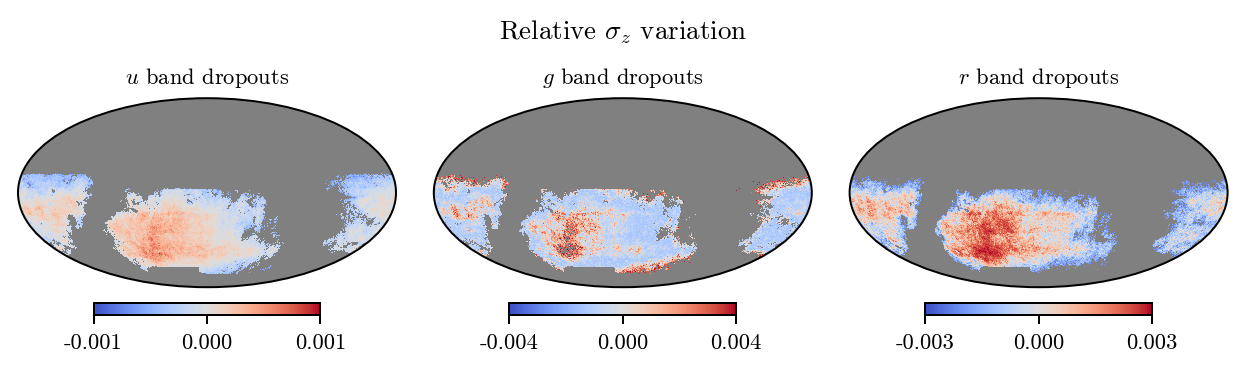

In [55]:
# Plot relative depth variations
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(7, 2), dpi=180)

# Set the title
fig.suptitle("Relative $\sigma_z$ variation")

# u dropouts
pz_sig = map_pz_sig(u5, r5, "u")
rdpz_sig = (pz_sig - np.nanmean(pz_sig)) / np.nanmean(pz_sig)
plot_map(rdpz_sig, "$u$ band dropouts", n_dec=3, sub=131)

# g dropouts
pz_sig = map_pz_sig(g5, i5, "g")
# Additional processing to make g plot look nicer
dpz_sig = pz_sig - pz_sig.mean()
dpz_sig.mask = dpz_sig.mask | (dpz_sig > 0.0002)
rdpz_sig = dpz_sig / np.nanmean(pz_sig[dpz_sig.mask == False])
# Now plot
plot_map(rdpz_sig, "$g$ band dropouts", n_dec=3, sub=132)

# r dropouts
pz_sig = map_pz_sig(r5, z5, "r", cut_on_drop=False)
rdpz_sig = (pz_sig - np.nanmean(pz_sig)) / np.nanmean(pz_sig)
plot_map(rdpz_sig, "$r$ band dropouts", n_dec=3, sub=133)

# Hide axes
ax1.set_axis_off()
ax2.set_axis_off()
ax3.set_axis_off()

# Push axes closer together
plt.subplots_adjust(wspace=0.1)

fig.savefig("figures/map_pz_sig.pdf")